In [ ]:
%run imports.py

### Networks

#### Ring Network

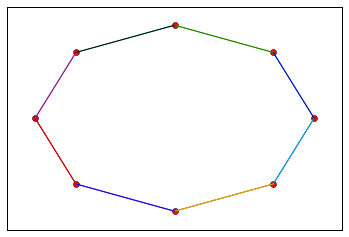

In [2]:
x = Bidirectional_Ring(8)
x.draw()

In [3]:
x.state()

[('P5', {'n': 8}),
 ('P1', {'n': 8}),
 ('P6', {'n': 8}),
 ('P0', {'n': 8}),
 ('P4', {'n': 8}),
 ('P2', {'n': 8}),
 ('P7', {'n': 8}),
 ('P3', {'n': 8})]

#### Line Network

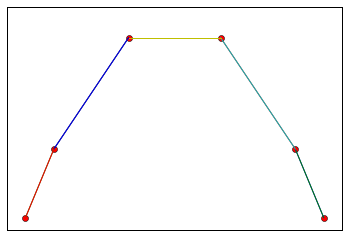

In [4]:
Bidirectional_Line(6).draw()

#### Random Line Network

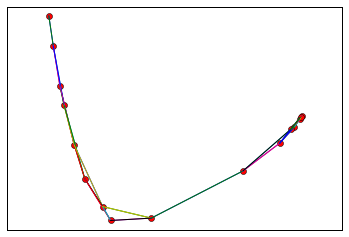

In [5]:
Random_Line_Network(16).draw()

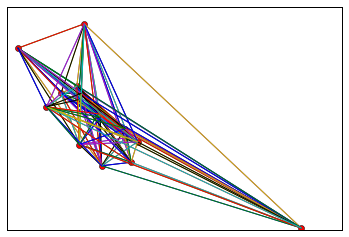

In [6]:
Random_Line_Network(16, sparsity=0).draw()

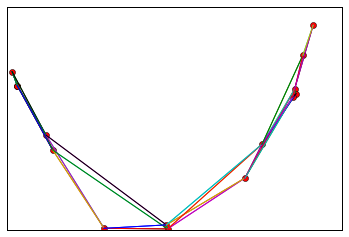

In [7]:
Random_Line_Network(16, sparsity=0.5).draw()

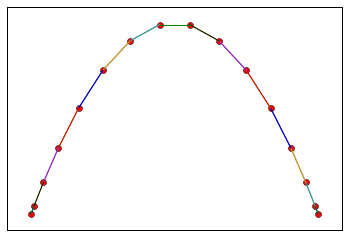

In [8]:
Random_Line_Network(16, sparsity=float('inf')).draw()

### Algorithms

#### A Basic Algorithm: LCR

In [9]:
x = Unidirectional_Ring(5)

##### Initial Network State

In [10]:
x.state()

[('P3', {'n': 5}),
 ('P4', {'n': 5}),
 ('P1', {'n': 5}),
 ('P2', {'n': 5}),
 ('P0', {'n': 5})]

In [11]:
lcr = LCR(x)

--------------
Running LCR on
[P3 -> {P4}, P4 -> {P1}, P1 -> {P2}, P2 -> {P0}, P0 -> {P3}]
Round 1
P1.status is non-leader
P0.status is non-leader
Round 2
P2.status is non-leader
Round 3
Round 4
P3.status is non-leader
Round 5
P4.status is leader
LCR Terminated
Message Complexity: 10
Time Complexity: 5
------------------


##### Time Complexity

In [12]:
print lcr.r, "rounds"

5 rounds


##### Message Complexity

In [13]:
print lcr.message_count, "messages"

10 messages


##### Final Network State

In [14]:
x.state()

[('P3', {'n': 5, 'status': 'non-leader'}),
 ('P4', {'n': 5, 'status': 'leader'}),
 ('P1', {'n': 5, 'status': 'non-leader'}),
 ('P2', {'n': 5, 'status': 'non-leader'}),
 ('P0', {'n': 5, 'status': 'non-leader'})]

#### Chaining Algorithms

In [15]:
x = Random_Line_Network(6)

In [16]:
#Elect a Leader
FloodMax(x, params={'verbosity': Algorithm.QUIET})

NameError: name 'FloodMax' is not defined

In [ ]:
#Construct a BFS tree rooted at the Leader 
SynchBFS(x)

In [ ]:
SynchConvergeHeight(x, params={'draw':True})

In [ ]:
x.state()

#### Equivalently, chain them like this:

In [ ]:
x = Random_Line_Network(6)
A = Chain(FloodMax(), Chain(SynchBFS(), SynchConvergeHeight()), params={'verbosity':Algorithm.QUIET})
A(x)

In [ ]:
x.state()

**A basic algorithm, with improved message complexity: HS**

In [ ]:
x = Bidirectional_Ring(8)

In [ ]:
hs = SynchHS(x)

In [ ]:
Message Complexity

In [ ]:
print hs.message_count, "messages"

### Benchmarking Algorithms

In [ ]:
benchmark(SynchLubyMIS, Random_Line_Network, testLubyMIS)

In [ ]:
benchmark(LCR, Bidirectional_Ring, testLeaderElection)

#### Benchmark an Asynchronous Algorithm

In [ ]:
benchmark(AsyncLCR, Unidirectional_Ring, testLeaderElection)

#### Or pass in a custom function that returns a network in the state your algorithm requires

In [ ]:
def Artificial_LE_Network(n):
    x = Random_Line_Network(n)
    for p in x:
        if p.UID == n-1:
            p.state['status'] = 'leader'
    return x

In [ ]:
benchmark(SynchBFS, Artificial_LE_Network, testBFS)

In [17]:
x = Random_Line_Network(6)


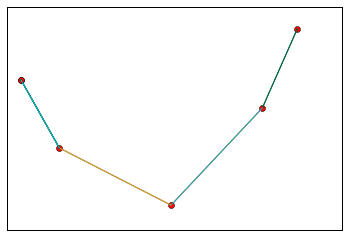

In [18]:
x.draw()